In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
warnings.filterwarnings('ignore')

In [2]:
print("현재 위치: ", os.getcwd())

현재 위치:  c:\Users\SAMSUNG\Desktop\Thyroid Project\Notebook


In [3]:
relative_path = '../data/thyroid+disease/new-thyroid.data'
print("파일 존재:", os.path.exists(relative_path))

파일 존재: True


In [4]:
# 여러 경로 시도
possible_paths = [
    '../data/thyroid+disease/',
    './data/thyroid+disease/',
    'data/thyroid+disease/',
    '../../data/thyroid+disease/'
]
# for문으로 파일경로 찾기
for path in possible_paths:
    if os.path.exists(path):
        print(f"데이터 폴더 찾음: {path}")
        print("내용:")
        for file in os.listdir(path):
            print(f"  {file}")
        break

데이터 폴더 찾음: ../data/thyroid+disease/
내용:
  allbp.data
  allbp.names
  allbp.test
  allhyper.data
  allhyper.names
  allhyper.test
  allhypo.data
  allhypo.names
  allhypo.test
  allrep.data
  allrep.names
  allrep.test
  ann-Readme
  ann-test.data
  ann-thyroid.names
  ann-train.data
  costs
  dis.data
  dis.names
  dis.test
  HELLO
  hypothyroid.data
  hypothyroid.names
  Index
  new-thyroid.data
  new-thyroid.names
  sick-euthyroid.data
  sick-euthyroid.names
  sick.data
  sick.names
  sick.test
  thyroid.theory
  thyroid0387.data
  thyroid0387.names


In [5]:
data_path = '../data/thyroid+disease/new-thyroid.data'
print("파일 존재:", os.path.exists(data_path))  # 파일 존재 확인
df = pd.read_csv(data_path, header=None)  # 파일 읽어오기
df.head()  # 첫 5번째 행 출력

파일 존재: True


,0,1,2,3,4,5
0,1,107,10.1,2.2,0.9,2.7
1,1,113,9.9,3.1,2.0,5.9
2,1,127,12.9,2.4,1.4,0.6
3,1,109,5.3,1.6,1.4,1.5
4,1,105,7.3,1.5,1.5,-0.1


In [6]:
df.info()  # 데이터 정보 불러오기 (결측치 없음)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       215 non-null    int64  
 1   1       215 non-null    int64  
 2   2       215 non-null    float64
 3   3       215 non-null    float64
 4   4       215 non-null    float64
 5   5       215 non-null    float64
dtypes: float64(4), int64(2)
memory usage: 10.2 KB


In [7]:
# names 파일 내용 파싱해서 핵심만 추출
names_file = '../data/thyroid+disease/new-thyroid.names'

# 핵심 정보만 추출해서 읽기
if os.path.exists(names_file):
    with open(names_file, 'r') as f:
        lines = f.readlines()
    
    print("=== 클래스 정보 ===")
    for line in lines:
        if 'Class' in line and ':' in line:
            print(line.strip())
    
    print("\n=== 데이터셋 기본 정보 ===")
    for line in lines:
        print(line.strip())
        
else:
    print("No such files exist.")

=== 클래스 정보 ===
1:	Class attribute (1 = normal, 2 = hyper, 3 = hypo)
9. Class Distribution: number of instances per class
Class 1: (normal)	150
Class 2: (hyper)	35
Class 3: (hypo)		30

=== 데이터셋 기본 정보 ===

1. Title of Database:
Thyroid gland data. ('normal', hypo and hyper functioning)

2. Sources:
(a) Original owner
Danny Coomans, Dept. of Maths. and Stats., James Cook University,
Townsville 4811, Australia.  email: madhc@manta.jcu.edu.au
(b) Donor of database
Stefan Aeberhard, Dept. of Comp. Science, James Cook University,
Townsville 4811, Australia.  email: stefan@coral.cs.jcu.edu.au
(c) Date received
July, 1992

3. Past Usage:
- (a) Coomans, D., Broeckaert, M. Jonckheer M. and Massart D.L.,
"Comparison of Multivariate Discriminant Techniques for
Clinical Data - Application to the Thyroid Functional State",
Meth. Inform. Med. 22 (1983) pp. 93-101.

(b) The data was used for comparing 16 different discriminant
techniques, each trying to predict the state of the
thyroid gland.

- (a) Co

In [8]:
# 0:	Class attribute (1 = normal, 2 = hyper, 3 = hypo)
# 1:	T3-resin uptake test. (A percentage)
# 2:	Total Serum thyroxin as measured by the isotopic
# displacement method.
# 3: 	Total serum triiodothyronine as measured by radioimmuno
# assay.
# 4: 	basal thyroid-stimulating hormone (TSH) as measured by
# radioimmuno assay.
# 5: 	Maximal absolute difference of TSH value after injection of
# 200 micro grams of thyrotropin-releasing hormone as compared
# to the basal value.

In [9]:
df[0].value_counts()  # 분류할 y값 찾음

0
1    150
2     35
3     30
Name: count, dtype: int64

In [10]:
y = df[[0]].rename(columns={0: 'Class_Target'})  # y값의 이름을 알아보기 쉽게 바꾸고 y를 데이터프레임 형식으로 출력
y  # 1이 정상, 2가 갑상선 항진증, 3이 갑상선 저하증

,Class_Target
0,1
1,1
2,1
3,1
4,1
...,...
210,3
211,3
212,3
213,3


In [11]:
X = df.drop(0, axis=1)  # 원활한 학습을 위해 y값 제거 (원래 데이터프레임의 이름이 출력되기 때문에 'Class_Target'이 아닌 0을 제거히는게 맞음)

# 열의 이륾을 속성과 맞게 바꿈
column_mapping = {
    1: 'T3_resin_uptake',
    2: 'Total_T4', 
    3: 'Total_T3',
    4: 'Basal_TSH',
    5: 'Max_TSH_diff'
}

X = X.rename(columns=column_mapping)
X

,T3_resin_uptake,Total_T4,Total_T3,Basal_TSH,Max_TSH_diff
0,107,10.1,2.2,0.9,2.7
1,113,9.9,3.1,2.0,5.9
2,127,12.9,2.4,1.4,0.6
3,109,5.3,1.6,1.4,1.5
4,105,7.3,1.5,1.5,-0.1
...,...,...,...,...,...
210,118,6.5,1.3,1.7,11.5
211,139,4.2,0.7,4.3,6.3
212,103,5.1,1.4,1.2,5.0
213,97,4.7,1.1,2.1,12.6


- 정의<br>
갑상선은 갑상선호르몬을 만들어 우리 몸의 대사를 촉진하고 기능을 유지시키는 역할을 합니다. 우리 몸에서 갑상선 호르몬이 감소하면 뇌하수체에서 갑상선자극호르몬(TSH)이 생산되어 갑상선 호르몬인 티록신(T4)와 삼요오드타이로닌(T3)를 분비하게 됩니다. 
갑상선 기능 검사는 갑상선과 관련된 호르몬인 갑상선자극호르몬(TSH), 티록신(T4), 삼요오드타이로닌(T3), Free T4의 혈중 농도를 측정하여 갑상선의 기능을 평가하고 이상유무를 파악하는 검사입니다. 

 

▶ TSH : 0.4~5.1 µU/mL<br>
▶ T4 : 5.9 ~ 13.8 ug/dL<br>
▶ T3 : 98.0 ~ 180 ng/dL<br>
▶ Free T4 : 0.8~1.9 ng/dL<Br>

- 출처: 서울아산병원 홈페이지 (https://www.amc.seoul.kr/asan/mobile/healthinfo/management/managementDetail.do?managementId=26)

In [12]:
X.describe()

,T3_resin_uptake,Total_T4,Total_T3,Basal_TSH,Max_TSH_diff
count,215.000000,215.000000,215.000000,215.000000,215.000000
mean,109.595349,9.804651,2.050233,2.880000,4.199070
std,13.145447,4.697362,1.419486,6.118031,8.070519
min,65.000000,0.500000,0.200000,0.100000,-0.700000
25%,103.000000,7.100000,1.350000,1.000000,0.550000
50%,110.000000,9.200000,1.700000,1.300000,2.000000
75%,117.500000,11.300000,2.200000,1.700000,4.100000
max,144.000000,25.300000,10.000000,56.400000,56.300000


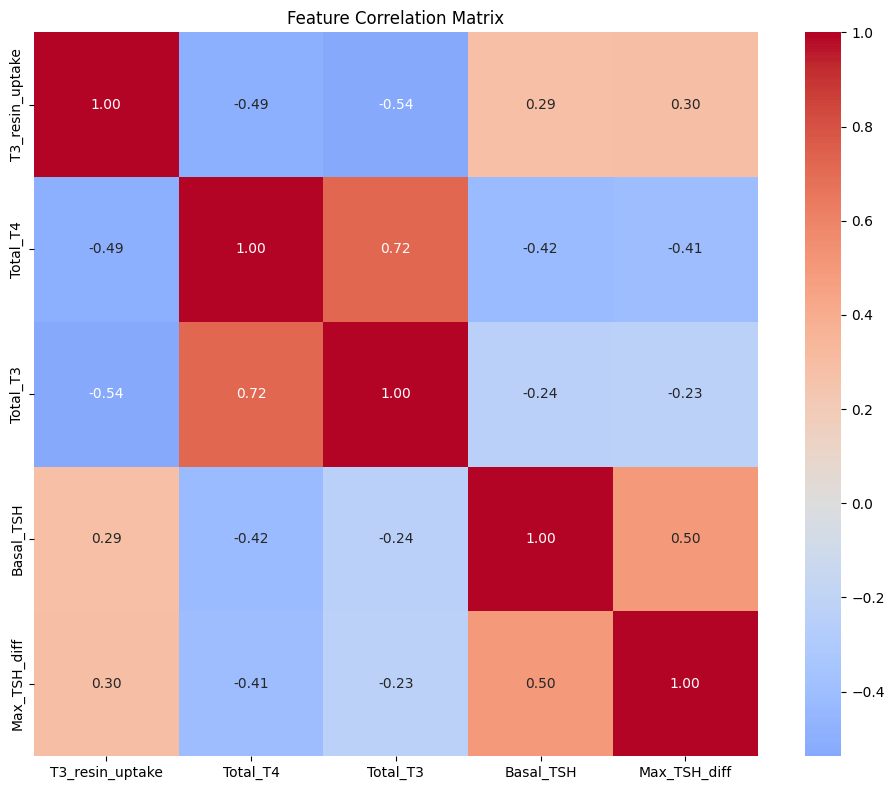

In [13]:
plt.figure(figsize=(10, 8))
corr = X.corr()
sns.heatmap(corr, 
           annot=True,           # 숫자 표시
           cmap='coolwarm',      # 색상 팔레트
           center=0,             # 0을 중심으로 색상
           square=True,          # 정사각형 셀
           fmt='.2f')            # 소수점 2자리
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

- 이 데이터는 다중공선성을 우려할 필요가 없고 각 피쳐마다 고유한 특성과 관계가 있다는 것을 알게 되었다.

In [14]:
# 클래스별 평균값 비교
print("=== 클래스별 평균 호르몬 수치 ===")
for class_num in [1, 2, 3]:
    class_name = {1: 'Normal', 2: 'Hyper', 3: 'Hypo'}[class_num]
    class_data = X[y['Class_Target'] == class_num]
    
    print(f"\n{class_name} (Class {class_num}):")
    print(f"  평균 TSH: {class_data['Basal_TSH'].mean():.2f}")
    print(f"  평균 T3: {class_data['Total_T3'].mean():.2f}")
    print(f"  평균 T4: {class_data['Total_T4'].mean():.2f}")

=== 클래스별 평균 호르몬 수치 ===

Normal (Class 1):
  평균 TSH: 1.32
  평균 T3: 1.73
  평균 T4: 9.19

Hyper (Class 2):
  평균 TSH: 0.97
  평균 T3: 4.26
  평균 T4: 17.75

Hypo (Class 3):
  평균 TSH: 12.92
  평균 T3: 1.06
  평균 T4: 3.60


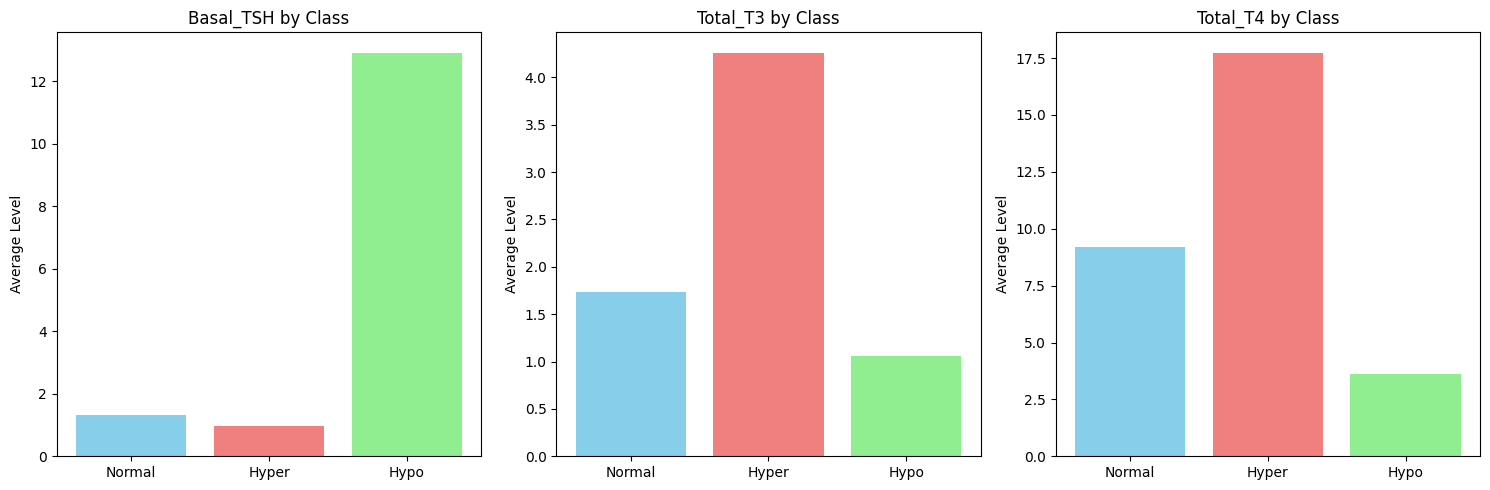

In [15]:
# 클래스별 주요 호르몬 비교 차트
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

hormones = ['Basal_TSH', 'Total_T3', 'Total_T4']
class_names = ['Normal', 'Hyper', 'Hypo']

for i, hormone in enumerate(hormones):
    means = []
    for class_num in [1, 2, 3]:
        class_data = X[y['Class_Target'] == class_num]
        means.append(class_data[hormone].mean())
    
    axes[i].bar(class_names, means, color=['skyblue', 'lightcoral', 'lightgreen'])
    axes[i].set_title(f'{hormone} by Class')
    axes[i].set_ylabel('Average Level')

plt.tight_layout()
plt.show()

- 갑상선 저하증 환자들에게는 갑상선 자극 호르몬이 지나치게 뇌하수체에서 분비되음.
- 갑상선 항진증 환자들에게는 T3, T4 호르몬이 정상에 비해 압도적으로 많이 분비되고 있다는 것을 확인할 수 있음. 
- 갑상선 자극 호르몬과 T3, T4 호르몬이 길항작용을 하는거 같다고 판단이 됨.

이 검사는 혈중 티록신, T4의 양을 측정합니다. T4는 갑상선이 생성하는 두 주요 호르몬 중의 하나입니다; 다른 하나는 삼요오드티로닌, T3입니다. 갑상선은 성대 바로 밑에 위치한 작은 나비 모양의 기관입니다. 갑상선은 대사 즉 에너지가 사용되는 속도를 조절하는 중요한 역할을 담당합니다.

인체는 갑상선호르몬 생성을 시작 또는 중단하는 피드백 시스템을 가지고 있습니다. 혈류 내 T4 농도가 감소할 때, 시상하부는 갑상선자극호르몬-방출호르몬을 분비하여 뇌하수체를 자극함으로써 갑상선자극호르몬을 방출하게 하고, 갑상선자극호르몬은 갑상선을 자극하여 T4 생성 및 분비를 증가시킨다. 혈중 T4 농도가 증가하면, TSH 분비가 억제됩니다.

T4는 갑상선호르몬의 약 90%를 차지합니다. 인체가 갑상선호르몬을 필요로 하면, 갑상선은 저장된 T4를 혈류 속으로 분비하게 됩니다. 혈액에서 T4는 자유형(비결합형) 또는 단백질 결합형(기본적으로 티록신결합글로불린에 결합된)으로 존재합니다. 자유형 T4의 농도는 총 T4 농도의 약 0.1%입니다. T4는 간 또는 다른 조직에서 T3로 전환됩니다. T4처럼 T3도 대부분은 단백질과 결합되어 있지만, 생물학적 활성도를 갖는 것은 T3 및 T4 자유형입니다. T3 자유형은 혈류 내 T4 자유형보다 활성도가 4-5배 높습니다.

갑상선 기능부전으로 또는 TSH 농도가 낮아서 갑상선이 T4를 충분히 생성하지 못하면, 체중증가, 피부건조, 추위민감, 불규칙 월경 및 피로감과 같은 갑상선기능저하증의 증상이 생기게 됩니다. 갑상선이 과량의 T4를 생성하게 되면, 체내 기능들의 속도가 증가하게 되고 심박수 증가, 불안, 체중감소, 불면, 손떨림 및 눈이 건조하고 시리며 눈 주위가 붓는 등의 갑상선기능항진증 관련 증상이 발생하게 됩니다.

가장 흔한 갑상선 기능부전의 원인은 자가면역과 관련된 것입니다. 그레이브스병은 갑상선기능항진증을 유발하며, 하시모토 갑상선염은 갑상선기능저하증을 유발합니다. 갑상선염, 갑상선암 및 TSH의 생성과다 또는 결핍에 의해 갑상선기능항진증 및 갑상선기능저하증이 둘다 발생될 수 있습니다. 갑상선호르몬 생성에 대한 이들의 영향은 총 T4(결합형 및 유리형을 포함) 또는 T4 유리형(비결합형)을 측정함으로써 검출 및 감시될 수 있습니다.

출처: 대한진단검사의학회 (https://www.labtestsonline.co.kr/lm/analytes/t4.html)

<Axes: >

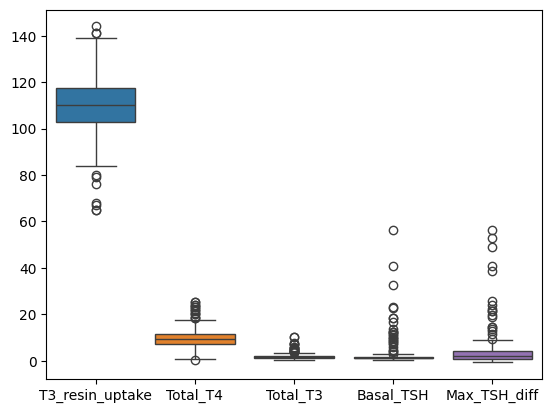

In [16]:
sns.boxplot(X)

In [17]:
# 각 컬럼별 아웃라이어 확인
for col in X.columns:
    Q1 = X[col].quantile(0.25)
    Q3 = X[col].quantile(0.75)
    IQR = Q3 - Q1    # 벅스플롯의 이상치 탐지를 위한 IQR 기준
    
    outliers = X[(X[col] < Q1 - 1.5*IQR) | (X[col] > Q3 + 1.5*IQR)] # 이상치를 각 열마다 셈
    print(f"{col}: {len(outliers)}개 이상치")  # 이상치 갯수 출력

T3_resin_uptake: 10개 이상치
Total_T4: 16개 이상치
Total_T3: 20개 이상치
Basal_TSH: 26개 이상치
Max_TSH_diff: 18개 이상치


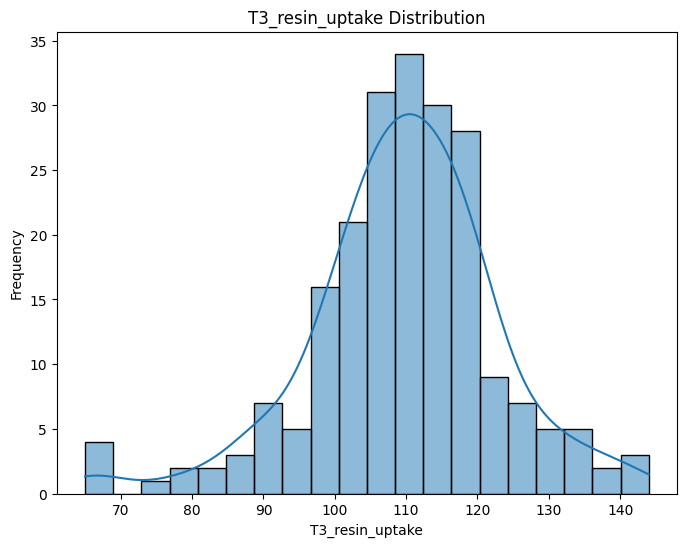

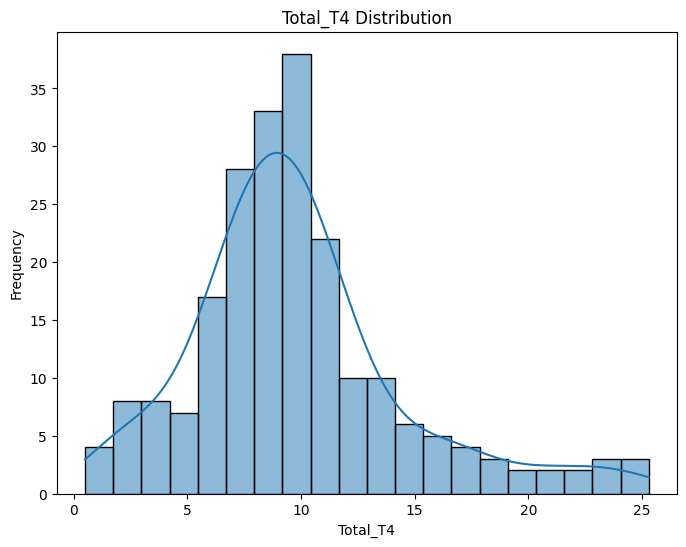

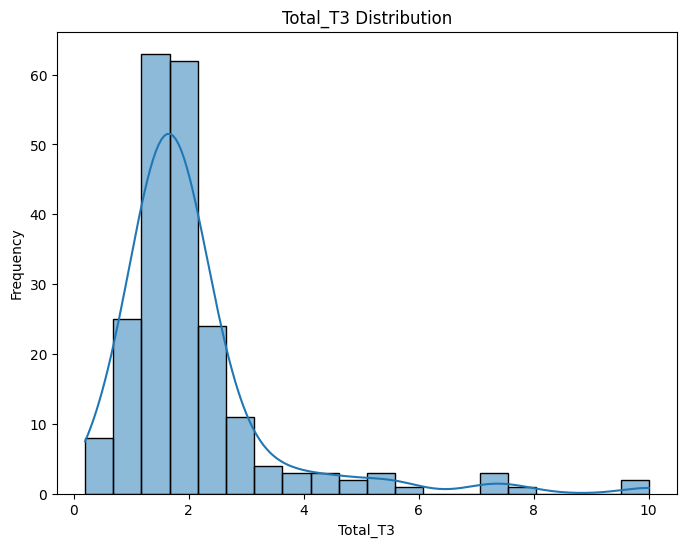

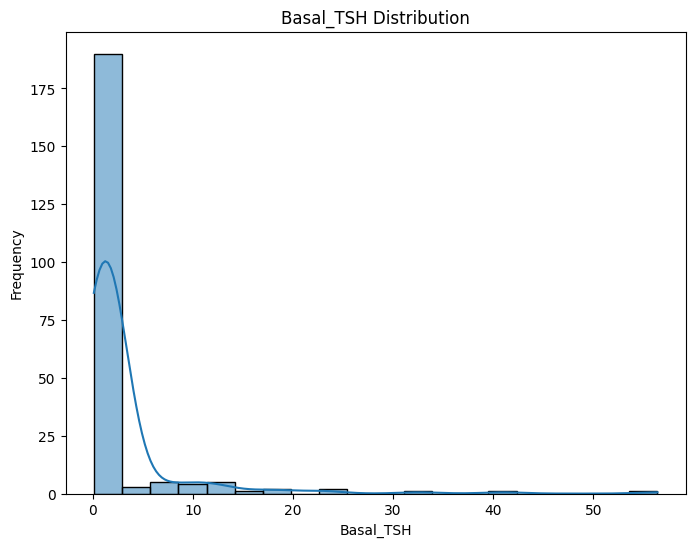

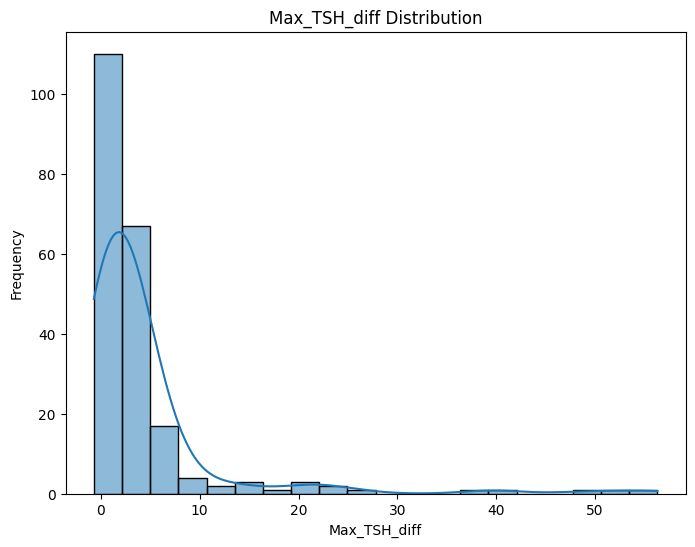

In [18]:
# X의 열마다 하나씩 그리기
for col in X.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(X[col], bins=20, kde=True)
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

이상치 분석
- **특수 환자 케이스로 인한 자연스러운 현상**
- 통계적 이상치는 의학적 이상이 아닐 수도 있음
- 중증 환자의 극값들로 **제거하지 않고 보존**

In [19]:
rs = RobustScaler()  # RobustScaler를 쓴 이유: 필요한 극단값이 있어 그 이상치들에 최소한으로 영향을 받으려고 함.
X_scaled = rs.fit_transform(X)
X_scaled

array([[-0.20689655,  0.21428571,  0.58823529, -0.57142857,  0.1971831 ],
       [ 0.20689655,  0.16666667,  1.64705882,  1.        ,  1.09859155],
       [ 1.17241379,  0.88095238,  0.82352941,  0.14285714, -0.3943662 ],
       ...,
       [-0.48275862, -0.97619048, -0.35294118, -0.14285714,  0.84507042],
       [-0.89655172, -1.07142857, -0.70588235,  1.14285714,  2.98591549],
       [-0.55172414, -0.92857143, -0.35294118,  0.        ,  1.32394366]],
      shape=(215, 5))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42) # train과 test를 나눔

lr = LogisticRegression() # 로지스틱 회귀 인스턴스를 만든다.
lr.fit(X_train, y_train) # 로지스틱 회귀로 모델 훈련
preds = lr.predict(X_test) # 훈련 모델 학습 기반 예측

print(confusion_matrix(y_test, preds))  # confusion matrix로 클래스별 예측 결과 분포(맞춘 개수/틀린 개수)"를 확인하는 용도
print(classification_report(y_test, preds))  # # precision, recall, f1-score, support까지 종합적으로 확인

[[28  0  0]
 [ 0  8  0]
 [ 1  0  6]]
              precision    recall  f1-score   support

           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00         8
           3       1.00      0.86      0.92         7

    accuracy                           0.98        43
   macro avg       0.99      0.95      0.97        43
weighted avg       0.98      0.98      0.98        43



- 모델 학습의 결론: 로지스틱 회귀 모델이 갑상선 데이터에서 전체적으로 98% 정확도를 보였으며, 특히 정상과 항진증은 완벽히 구분했습니다. 다만 저하증 환자 일부가 정상으로 분류되는 경우가 있어, recall을 더 높이는 방향의 추가 보완이 필요함.